# Data Analysis and Interpretation Phase 1 - Project Scoping

## Abstract

In recent years, more and more movies are being released, and at an accelerating rate. With this volume of cinema, discovering the trends across the highest grossing and most critically acclaimed movies over the years is of increasing improtance and difficulty. Our DSCI 521 term project will take a look at the movies that have been released over the years, and explore what trends have come into existence. Our analysis will look at a selection of movies between the years 1977 and 2019, and discover what trends exist between variables such as genre, budget, and mpaa rating with respect to gross and popularity. Once these trends are discovered, they will be presented in the form of graphs and models for ease of understanding.

### Project Scope

Our plan is to create several hypothesis on what trends we'd expect to see after a cursory look at the data, before seeing if our hypotheses are founded by further analysis.

### Source of Data

Dataset Used: https://www.kaggle.com/datasets/narmelan/top-ten-blockbusters-20191977

### Potential Users
This project is of potential interest to Studios, Producers, Directors, and those who like movies. With our analysis focusing on recent trends in movies and cinema, I believe that the trends found and discovered can be used by these groups to either increase profits or otherwise make decisions. 

For movie fans, this analysis could be useful for those that want to find the best movies of any decade. This already exists, but the advantage of this analysis is that it shows more details about each movie as compared to other websites that rank the best movies of a decade. 

For movie producers/directors, this analysis could be used to better understand what makes a successful movie, and what specific genre of movies are currently popular. This would allow them to create more marketable movies, or to better market their movies to specific audiences. 

### Exploratory Data Analysis

In [1]:
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

data = pd.read_csv('./data/Blockbusters_2019-1977.csv', encoding = 'unicode_escape')
data.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi


### Data Cleaning

In [2]:
# Change data types
data.dtypes

release_year              int64
rank_in_year              int64
imdb_rating             float64
mpaa_rating              object
film_title               object
film_budget              object
length_in_min             int64
domestic_distributor     object
worldwide_gross          object
domestic_gross           object
genre_1                  object
genre_2                  object
genre_3                  object
dtype: object

In [3]:
# Turn necessary strings in data into ints
for el in range(len(data['film_budget'])):
    data['film_budget'][el] = data['film_budget'][el].replace(',','')
    data['worldwide_gross'][el] = data['worldwide_gross'][el].replace(',','')
    data['domestic_gross'][el] = data['domestic_gross'][el].replace(',','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [4]:
data['film_budget'] = data['film_budget'].astype(float)
data['worldwide_gross'] = data['worldwide_gross'].astype(float)
data['domestic_gross'] = data['domestic_gross'].astype(float)

data.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000.0,181,Walt Disney,2.797801e+09,858373000.0,Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,260000000.0,118,Walt Disney,1.656943e+09,543638043.0,Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,150000000.0,103,Walt Disney,1.420560e+09,470089732.0,Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000.0,129,Sony Pictures,1.131928e+09,390532085.0,Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,175000000.0,123,Walt Disney,1.128275e+09,426829839.0,Action,Adventure,Sci-Fi


In [5]:
data.dtypes

release_year              int64
rank_in_year              int64
imdb_rating             float64
mpaa_rating              object
film_title               object
film_budget             float64
length_in_min             int64
domestic_distributor     object
worldwide_gross         float64
domestic_gross          float64
genre_1                  object
genre_2                  object
genre_3                  object
dtype: object

In [6]:
# Descriptive Analysis
data.describe()

,release_year,rank_in_year,imdb_rating,film_budget,length_in_min,worldwide_gross,domestic_gross
count,430.000000,430.000000,430.000000,4.300000e+02,430.000000,4.300000e+02,4.300000e+02
mean,1998.000000,5.500000,7.076744,8.892866e+07,120.602326,4.993737e+08,2.020996e+08
std,12.424129,2.875627,0.801815,7.497386e+07,22.615721,3.966114e+08,1.335447e+08
min,1977.000000,1.000000,3.700000,3.250000e+05,60.000000,3.718714e+07,2.721100e+06
25%,1987.000000,3.000000,6.600000,2.200000e+07,104.000000,2.155117e+08,1.056844e+08
50%,1998.000000,5.500000,7.000000,7.075000e+07,119.000000,3.800620e+08,1.736978e+08
75%,2009.000000,8.000000,7.675000,1.500000e+08,134.000000,7.317081e+08,2.610920e+08
max,2019.000000,10.000000,9.000000,3.560000e+08,201.000000,2.797801e+09,9.366622e+08


In [7]:
data.dtypes

release_year              int64
rank_in_year              int64
imdb_rating             float64
mpaa_rating              object
film_title               object
film_budget             float64
length_in_min             int64
domestic_distributor     object
worldwide_gross         float64
domestic_gross          float64
genre_1                  object
genre_2                  object
genre_3                  object
dtype: object

In [8]:
# Top 20 Highest Budget
data[['film_title','domestic_distributor','film_budget']].sort_values(by='film_budget', ascending=False).head(20).reset_index(drop=True)

,film_title,domestic_distributor,film_budget
0,Avengers: Endgame,Walt Disney,356000000.0
1,Avengers: Infinity War,Walt Disney,321000000.0
2,Star Wars: Episode VIII - The Last Jedi,Walt Disney,317000000.0
3,Pirates of the Caribbean: At World's End,Walt Disney,300000000.0
4,Superman Returns,Warner Bros.,270000000.0
5,The Lion King,Walt Disney,260000000.0
6,Tangled,Walt Disney,260000000.0
7,Spider-Man 3,Sony Pictures,258000000.0
8,The Dark Knight Rises,Warner Bros.,250000000.0
9,Pirates of the Caribbean: On Stranger Tides,Walt Disney,250000000.0


In [9]:
# Top 20 Highest Worldwide Box-Office
data[['film_title','domestic_distributor','worldwide_gross']].sort_values(by='worldwide_gross', ascending=False).head(20).reset_index(drop=True)

,film_title,domestic_distributor,worldwide_gross
0,Avengers: Endgame,Walt Disney,2.797801e+09
1,Avatar,Twentieth Century Fox,2.744337e+09
2,Star Wars: Episode VII - The Force Awakens,Walt Disney,2.068224e+09
3,Avengers: Infinity War,Walt Disney,2.048360e+09
4,Titanic,Paramount Pictures,1.850197e+09
5,Jurassic World,Universal Pictures,1.670401e+09
6,The Lion King,Walt Disney,1.656943e+09
7,The Avengers,Walt Disney,1.518813e+09
8,Furious 7,Universal Pictures,1.515048e+09
9,Frozen II,Walt Disney,1.420560e+09


In [10]:
# Top 20 Highest Domestic Box Office
data[['film_title','domestic_distributor','domestic_gross']].sort_values(by='domestic_gross', ascending=False).head(20).reset_index(drop=True)

,film_title,domestic_distributor,domestic_gross
0,Star Wars: Episode VII - The Force Awakens,Walt Disney,936662225.0
1,Avengers: Endgame,Walt Disney,858373000.0
2,Avatar,Twentieth Century Fox,749766139.0
3,Black Panther,Walt Disney,700059566.0
4,Avengers: Infinity War,Walt Disney,678815482.0
5,Jurassic World,Universal Pictures,652270625.0
6,The Avengers,Walt Disney,623357910.0
7,Star Wars: Episode VIII - The Last Jedi,Walt Disney,620181382.0
8,Incredibles 2,Walt Disney,608581744.0
9,Titanic,Paramount Pictures,600788188.0


In [11]:
# Which domestic distributor got 
# the highest domestic gross?
data.groupby('domestic_distributor')['domestic_gross'].sum().sort_values(ascending = True)

domestic_distributor
The H Collective                   2.721100e+06
Embassy Pictures                   4.236558e+07
Fox Searchlight Pictures           4.595012e+07
Compass International Pictures     4.700000e+07
Rank Film Distributors             5.270083e+07
Vestron Pictures                   6.344638e+07
American International Pictures    8.643200e+07
Miramax                            1.003178e+08
IFC Films                          2.414382e+08
Icon Productions                   3.702746e+08
United Artists                     5.598093e+08
Orion Pictures                     6.303244e+08
Summit Entertainment               8.784425e+08
TriStar Pictures                   1.074622e+09
Metro-Goldwyn-Mayer                1.366151e+09
Columbia Pictures                  1.647179e+09
New Line Cinema                    1.718727e+09
Lionsgate                          1.743863e+09
DreamWorks                         4.030638e+09
Sony Pictures                      6.610051e+09
Paramount Pictures 

Text(0.5, 1.0, 'Film Budget over Time')

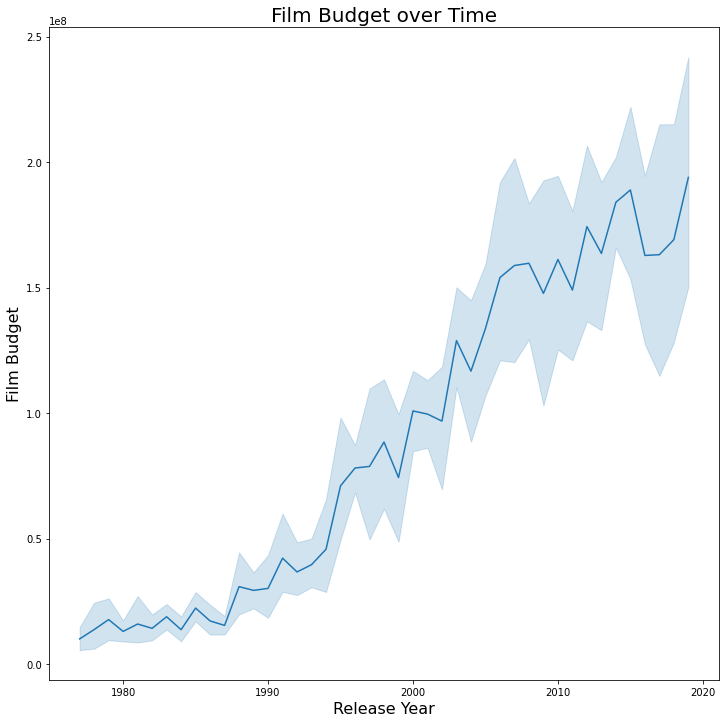

In [12]:
# Budget over the years
plt.subplots(figsize = (12,12))

sns.lineplot(data = data, 
             x = 'release_year', y = 'film_budget')

plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Film Budget', fontsize=16)
plt.title("Film Budget over Time", fontsize=20)

Text(0.5, 1.0, 'Film Budget vs Imdb Rating')

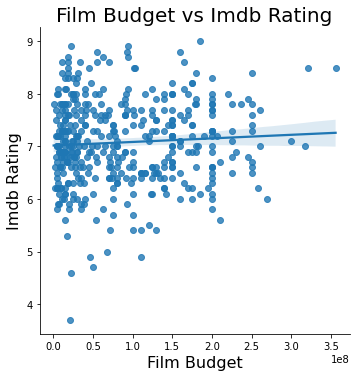

In [13]:
# Budget vs rating
sns.lmplot(data = data, 
           x = 'film_budget', y = 'imdb_rating')
plt.xlabel('Film Budget', fontsize=16)
plt.ylabel('Imdb Rating', fontsize=16)
plt.title("Film Budget vs Imdb Rating", fontsize=20)

Text(0.5, 1.0, 'Film Budget vs Worldwide Gross')

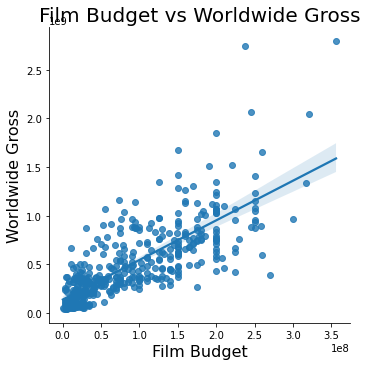

In [14]:
# Budget vs worldwide_gross
sns.lmplot(data = data, 
           x = 'film_budget', y = 'worldwide_gross')
plt.xlabel('Film Budget', fontsize=16);
plt.ylabel('Worldwide Gross', fontsize=16);
plt.title("Film Budget vs Worldwide Gross", fontsize=20)

Text(0.5, 1.0, 'MPAA Rating vs Imdb Rating')

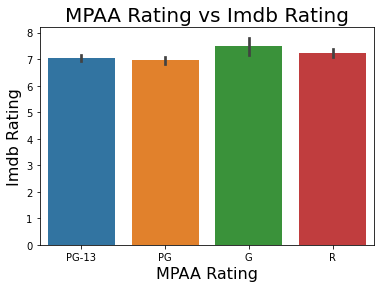

In [15]:
# Rating vs Popularity
sns.barplot(data = data, 
           x = 'mpaa_rating', y = 'imdb_rating')
plt.xlabel('MPAA Rating', fontsize=16);
plt.ylabel('Imdb Rating', fontsize=16);
plt.title("MPAA Rating vs Imdb Rating", fontsize=20)

Text(0.5, 1.0, 'MPAA Rating vs Worldwide Gross')

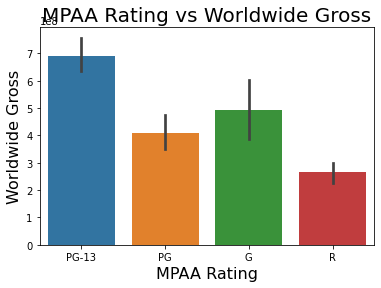

In [16]:
# Rating vs Gross
sns.barplot(data = data, 
           x = 'mpaa_rating', y = 'worldwide_gross')
plt.xlabel('MPAA Rating', fontsize=16);
plt.ylabel('Worldwide Gross', fontsize=16);
plt.title("MPAA Rating vs Worldwide Gross", fontsize=20)

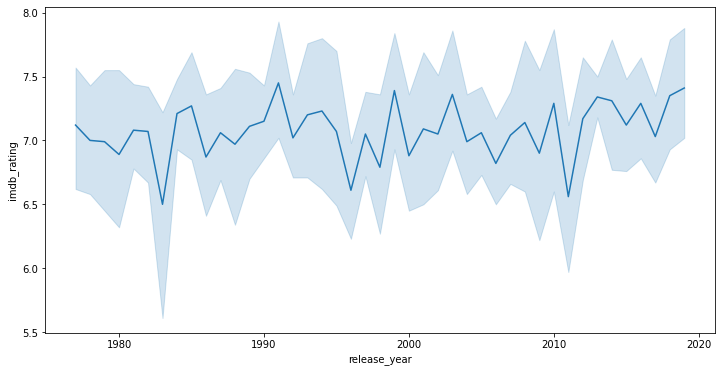

In [17]:
# Ratings over the years

plt.figure(figsize = (12,6))

sns.lineplot(data = data, 
             x = 'release_year', y = 'imdb_rating')

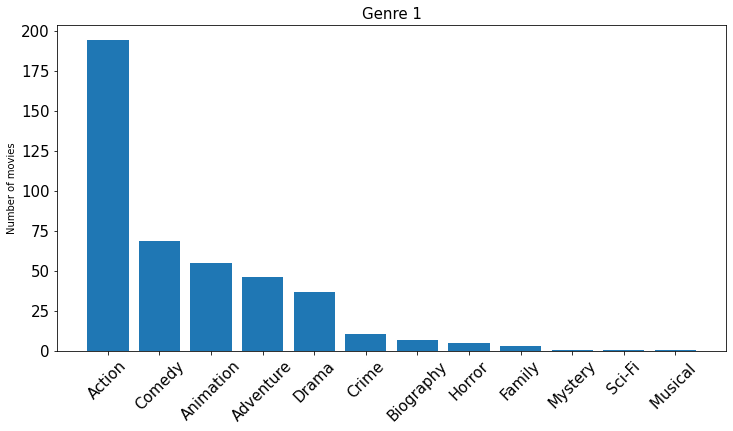

In [18]:
# Movie Genre Distribution
import matplotlib.pyplot as plt

bar_fig = plt.figure(figsize = (12,6))

_ = plt.bar(x = 
            list(data['genre_1'].value_counts().index),
           height = list(data['genre_1'].value_counts()))

plt.tick_params(labelsize = 15)

plt.title("Genre 1", fontsize = 15)

_ = plt.ylabel("Number of movies", fontsize = 10)

_ = plt.xticks(rotation = 45)

As we can see, Action movies vastly outnumber the other kinds.

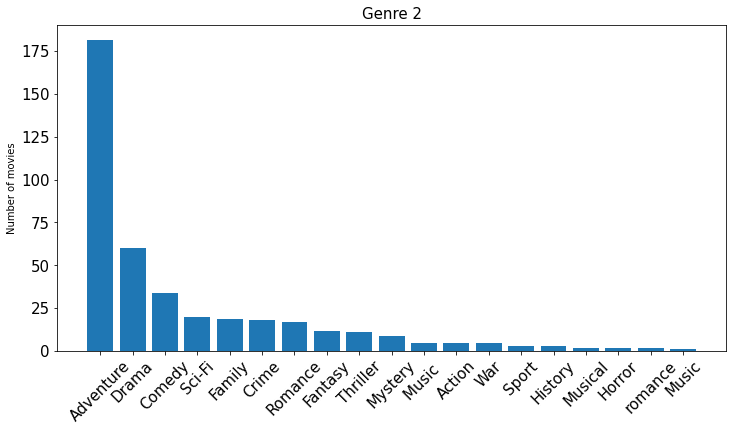

In [19]:

bar_fig = plt.figure(figsize = (12,6))

_ = plt.bar(x = 
            list(data['genre_2'].value_counts().index),
           height = list(data['genre_2'].value_counts()))

plt.tick_params(labelsize = 15)

plt.title("Genre 2", fontsize = 15)

_ = plt.ylabel("Number of movies", fontsize = 10)

_ = plt.xticks(rotation = 45)

And, similarly, Adventure movies outnumber the other kinds.

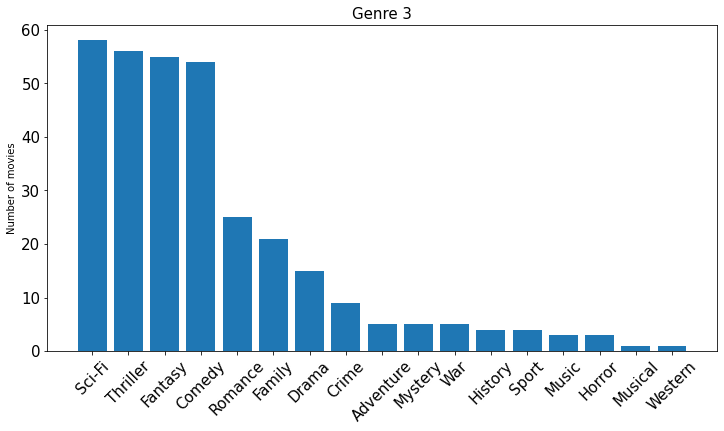

In [20]:

bar_fig = plt.figure(figsize = (12,6))

_ = plt.bar(x = 
            list(data['genre_3'].value_counts().index),
           height = list(data['genre_3'].value_counts()))

plt.tick_params(labelsize = 15)

plt.title("Genre 3", fontsize = 15)

_ = plt.ylabel("Number of movies", fontsize = 10)

_ = plt.xticks(rotation = 45)

With 'Genre 3', Sci-Fi narrowly beats Thriller, Fantasy, and Comedy movies. This is all in terms of frequency of course. To get a true inkling of which genres are popular, we have to look at the ratings.

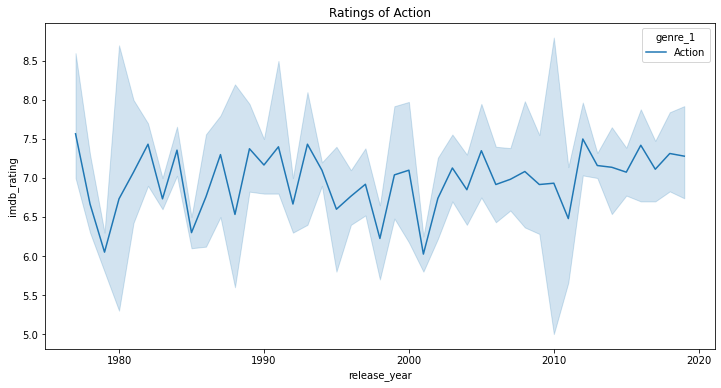

In [21]:
def genre_lineplot(data, genre, genre_type):
    plt.figure(figsize = (12,6))

    mask = [genre == 'Action' for genre in data[genre_type]]
    masked_data = data[mask]

    sns.lineplot(data = masked_data, 
                 x = 'release_year', y = 'imdb_rating',
                 hue = 'genre_1').set(title=f"Ratings of {genre}")
    
genre_lineplot(data, "Action", 'genre_1')

In [22]:
# Genre vs Popularity

movieGenrePop = data[['genre_1','genre_2','genre_3','imdb_rating']]

genre_list = []
i = 0
for el in movieGenrePop:
    if(i < 3):
        for genre in movieGenrePop[el]:
            if(not pd.isna(genre)):
                genre_list.append(genre)
        i += 1

genreSet = set(genre_list)

genreDict = defaultdict()
for genre in genreSet:
    genreDict[genre] = []

for el in range(len(movieGenrePop)):
    if(movieGenrePop['genre_1'][el] in genreSet):
        genreDict[movieGenrePop['genre_1'][el]].append(movieGenrePop['imdb_rating'][el])
    if(movieGenrePop['genre_2'][el] in genreSet):
        genreDict[movieGenrePop['genre_2'][el]].append(movieGenrePop['imdb_rating'][el])
    if(movieGenrePop['genre_3'][el] in genreSet):
        genreDict[movieGenrePop['genre_3'][el]].append(movieGenrePop['imdb_rating'][el])
        
genDict = {'genre': [], 'mean': []}
for genre in genreDict:
    genDict['genre'].append(genre)
for genre in genreDict:
    genDict['mean'].append(np.mean(genreDict[genre]))
    
genreRating_df = pd.DataFrame.from_dict(genDict)


In [23]:
genreRating_df.sort_values(by=['mean'], inplace=True, ascending=False)

<Figure size 864x432 with 0 Axes>

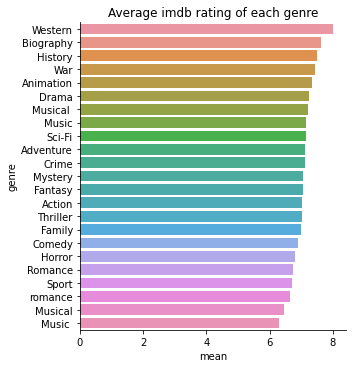

In [24]:
# Average imdb rating of each genre
plt.figure(figsize = (12,6))
sns.catplot(data = genreRating_df, 
            y = 'genre', x = 'mean',
           kind = 'bar').set(title="Average imdb rating of each genre")

<Figure size 864x432 with 0 Axes>

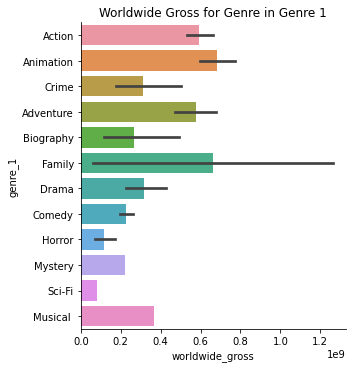

In [25]:
# Genre vs Gross
plt.figure(figsize = (12,6))
sns.catplot(data = data, 
            y = 'genre_1', x = 'worldwide_gross',
           kind = 'bar').set(title="Worldwide Gross for Genre in Genre 1")

<Figure size 864x432 with 0 Axes>

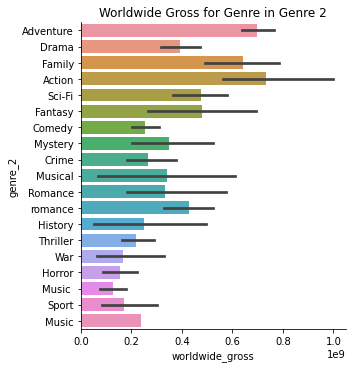

In [26]:
# Genre vs Gross
plt.figure(figsize = (12,6))
sns.catplot(data = data, 
            y = 'genre_2', x = 'worldwide_gross',
           kind = 'bar').set(title="Worldwide Gross for Genre in Genre 2")

<Figure size 864x432 with 0 Axes>

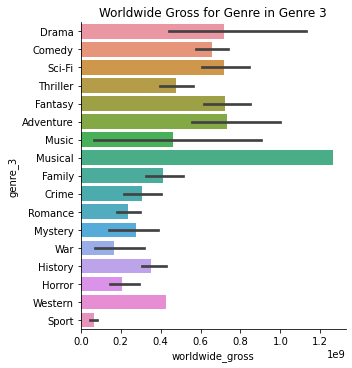

In [27]:
# Genre vs Gross
plt.figure(figsize = (12,6))
sns.catplot(data = data, 
            y = 'genre_3', x = 'worldwide_gross',
           kind = 'bar').set(title="Worldwide Gross for Genre in Genre 3")

In [28]:
# Co-Genres
movies = defaultdict()

i = 0
for title in data['film_title']:
    movies[title] = {'genres' : [data['genre_1'][i],data['genre_2'][i],data['genre_3'][i]]}
    i += 1     

In [29]:
def count_cogenres(movies):
    
    cogenres = defaultdict(lambda : Counter())
    
    for movie in movies:
        for genre in movies[movie]['genres']:
            for cogenre in movies[movie]['genres']:
                if(genre in movies[movie]['genres'] and cogenre in movies[movie]['genres']):
                    cogenres[genre][cogenre] += 1         
    
    return cogenres

def prob_genres(movies, cogenres, genre):
    
    numMovies = len(movies)
    numGenre = 0
    
    for el in cogenres[genre]:
        if(el == genre):
            numGenre += cogenres[genre][el]
    
    probability = numGenre / numMovies
    
    return probability

def prob_genre_given_genre(movies, cogenres, genre_a, genre_b):
    
    #--- Your code starts here
    numGenre = cogenres[genre_a][genre_b]
    numGenB = cogenres[genre_b][genre_b]
    
    probability = numGenre / numGenB
    #--- Your code starts here

    return probability

def likely_cogenres(movies, cogenres, genre):
    ## initilize a Counter() for the co-genre probabilities
    probs = Counter()
    
    genreList = []

    for movie in movies:
        for genr in movies[movie]['genres']:
            genreList.append(genr)
    
    genreSet = set(genreList)
    
    for gen in genreSet:
        condProb = prob_genre_given_genre(movies, cogenres, gen, genre)
        if(condProb != 0.0 and gen != genre and (not pd.isna(gen))):
            probs[gen] = condProb
    
    return probs

cogenres = count_cogenres(movies)
print(f"Probability of Action movie: {prob_genres(movies,cogenres,'Action')}")

print("Probability a movie contains `Adventure` given that it contains `Action`: ")
print(prob_genre_given_genre(movies, cogenres, "Adventure", "Action"))

likely_cogenres(movies, cogenres, "Action").most_common(10)

Probability of Action movie: 0.46604215456674475
Probability a movie contains `Adventure` given that it contains `Action`: 
0.7085427135678392


[('Adventure', 0.7085427135678392),
 ('Sci-Fi', 0.31155778894472363),
 ('Thriller', 0.23115577889447236),
 ('Comedy', 0.16080402010050251),
 ('Fantasy', 0.1407035175879397),
 ('Drama', 0.11055276381909548),
 ('Crime', 0.08542713567839195),
 ('Animation', 0.02512562814070352),
 ('Family', 0.02512562814070352),
 ('Mystery', 0.020100502512562814)]

In [30]:
def co_genre_plot(movies,cogenres,genre):
    bar_fig = plt.figure(figsize = (12,6))
    
    counter = likely_cogenres(movies, cogenres, genre)

    keys = counter.keys()
    y_pos = np.arange(len(keys))
    performance = [counter[k] for k in keys]

    plt.tick_params(labelsize = 15)

    plt.barh(y_pos, performance, align='center', alpha=0.4)
    plt.yticks(y_pos, keys)
    plt.xlabel('Probability', fontsize = 10)
    plt.title(f'{genre} Co-Genres', fontsize = 15)

    plt.show()

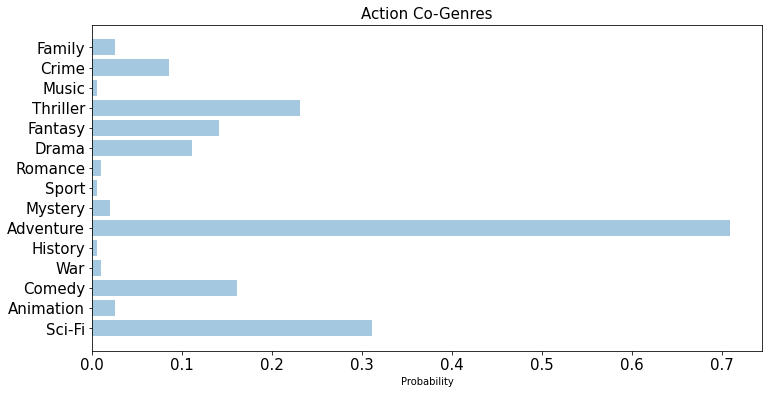

In [31]:
co_genre_plot(movies, cogenres, "Action")

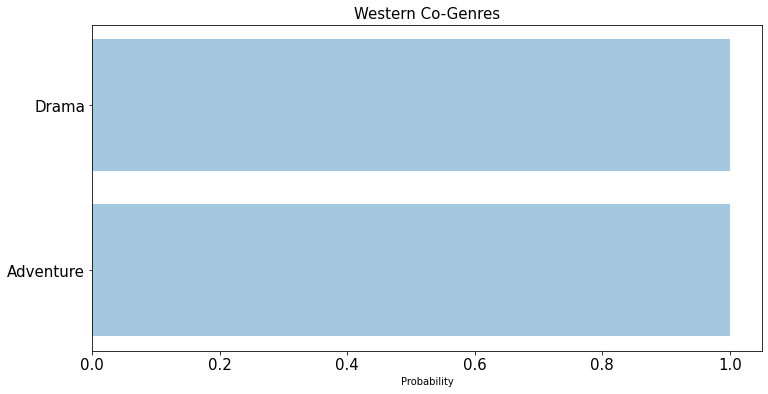

In [32]:
co_genre_plot(movies, cogenres, "Western")

Text(0.5, 1.0, 'Imdb Rating vs Worldwide Gross')

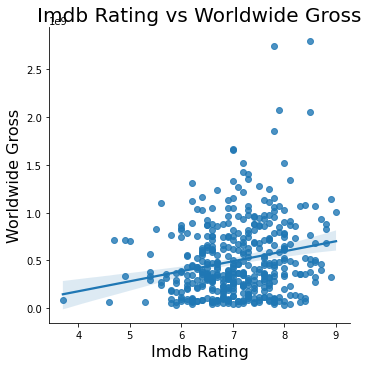

In [33]:
# Which is a better metric: Imdb Rating or Worldwide Gross?
sns.lmplot(data = data, 
           x = 'imdb_rating', y = 'worldwide_gross')
plt.xlabel('Imdb Rating', fontsize=16);
plt.ylabel('Worldwide Gross', fontsize=16);
plt.title("Imdb Rating vs Worldwide Gross", fontsize=20)

Looking at the plot, while it seems there's a slight positive correlation between Imdb Rating and Worldwide gross, its insufficient evidence to say if a higher imdb rating correlates to a higher gross and thus higher profit. From here on, in order to see what variables strongly correlate with popularity, we'll measure popularity as worldwide gross rather than Imdb rating. This is because worldwide gross is a less subjective measure of "success" than imdb rating, which can be prone to human fickleness. 

### Data Imputation

In [34]:
categorical_var = list(set(data.dtypes[data.dtypes == object].index))
numerical_var = list(set(data.columns) - set(data.dtypes[data.dtypes == object].index))
data[categorical_var] = data[categorical_var].fillna(data[categorical_var].mode(),
                                                inplace = False)
data[numerical_var] = data[numerical_var].fillna(data[numerical_var].median(),
                                                inplace = False)
[sum(data[i].isnull()) for i in data.columns]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 21, 106]

In [35]:
data

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000.0,181,Walt Disney,2.797801e+09,858373000.0,Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,260000000.0,118,Walt Disney,1.656943e+09,543638043.0,Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,150000000.0,103,Walt Disney,1.420560e+09,470089732.0,Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000.0,129,Sony Pictures,1.131928e+09,390532085.0,Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,175000000.0,123,Walt Disney,1.128275e+09,426829839.0,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1977,6,6.2,PG,The Deep,9000000.0,123,Columbia Pictures,4.734636e+07,47346365.0,Adventure,Mystery,Thriller
426,1977,7,7.1,PG,The Spy Who Loved Me,14000000.0,125,United Artists,4.683867e+07,46838673.0,Action,Adventure,Thriller
427,1977,8,6.6,PG,"Oh, God!",2100000.0,98,Warner Bros.,4.168724e+07,41687243.0,Comedy,Fantasy,NaN
428,1977,9,8.0,PG,Annie Hall,4000000.0,93,United Artists,3.825142e+07,38251425.0,Comedy,Romance,NaN


### Step 3: Create Dummy Variables and Dependent and Independent Variables

In [36]:
PKV = data[['worldwide_gross','release_year', 'rank_in_year', 'imdb_rating', 'mpaa_rating', 'film_budget','length_in_min','domestic_gross','genre_1']]

In [37]:
PKV = pd.get_dummies(data=PKV, drop_first=True)
PKV.head()

,worldwide_gross,release_year,rank_in_year,imdb_rating,film_budget,length_in_min,domestic_gross,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R,...,genre_1_Animation,genre_1_Biography,genre_1_Comedy,genre_1_Crime,genre_1_Drama,genre_1_Family,genre_1_Horror,genre_1_Musical,genre_1_Mystery,genre_1_Sci-Fi
0,2.797801e+09,2019,1,8.5,356000000.0,181,858373000.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.656943e+09,2019,2,7.0,260000000.0,118,543638043.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.420560e+09,2019,3,7.2,150000000.0,103,470089732.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.131928e+09,2019,4,7.6,160000000.0,129,390532085.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.128275e+09,2019,5,6.9,175000000.0,123,426829839.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_before = PKV
df_after = PKV.drop(['mpaa_rating_PG-13'], axis=1)




X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)


series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)


print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                152774.342373
worldwide_gross          10.458060
release_year              5.998669
rank_in_year              1.923749
imdb_rating               1.394230
film_budget               4.534537
length_in_min             2.327021
domestic_gross            6.526111
mpaa_rating_PG            5.979587
mpaa_rating_PG-13         9.505486
mpaa_rating_R             6.507573
genre_1_Adventure         1.278881
genre_1_Animation         2.831522
genre_1_Biography         1.131471
genre_1_Comedy            1.490000
genre_1_Crime             1.155010
genre_1_Drama             1.278338
genre_1_Family            1.061940
genre_1_Horror            1.083953
genre_1_Musical           1.036698
genre_1_Mystery           1.020582
genre_1_Sci-Fi            1.016786
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                145630.852311
worldwide_gross          10.457025
release_year              5.686323
rank_in_year              1.923743
imdb_rating               1.388284
film_budget               4.520044
length_in_min             2.302704
domestic_gross            6.515873
mpaa_rating_PG            1.649748
mpaa_rating_R             1.580757
genre_1_Adventure         1.235770
genre_1_Animation         1.892244
genre_1_Biography         1.130226
genre_1_Comedy            1.487352
genre_1_Crime             1.154665
genre_1_Drama             1.277437
genre_1_Family            1.055262
genre_1_Horror            1.082542
genre_1_Musical           1.031118
genre_1_Mystery           1.020580
genre_1_Sci-Fi            1.016381
dtype: float64

### Step 4: Correlation Matrix

In [39]:
corr = df_after.corr()
display(corr)

,worldwide_gross,release_year,rank_in_year,imdb_rating,film_budget,length_in_min,domestic_gross,mpaa_rating_PG,mpaa_rating_R,genre_1_Adventure,genre_1_Animation,genre_1_Biography,genre_1_Comedy,genre_1_Crime,genre_1_Drama,genre_1_Family,genre_1_Horror,genre_1_Musical,genre_1_Mystery,genre_1_Sci-Fi
worldwide_gross,1.000000,7.871297e-01,-4.040506e-01,0.211647,0.770431,0.334251,0.911447,-0.153970,-0.313978,0.066083,0.175633,-0.075711,-0.301443,-0.076937,-0.140343,0.034538,-0.105262,-0.016233,-0.033890,-0.051164
release_year,0.787130,1.000000e+00,-1.265602e-15,0.065986,0.817725,0.204329,0.690642,-0.249351,-0.301288,0.038804,0.246885,-0.078487,-0.281839,-0.033235,-0.213173,-0.022515,-0.139846,-0.077811,-0.031124,-0.058358
rank_in_year,-0.404051,-1.265602e-15,1.000000e+00,-0.248293,-0.130737,-0.205181,-0.424427,-0.076201,0.143442,-0.081206,-0.054545,0.028792,0.186402,0.146155,-0.059187,-0.034046,0.041539,-0.075641,0.042023,0.008405
imdb_rating,0.211647,6.598596e-02,-2.482928e-01,1.000000,0.063566,0.280297,0.247605,-0.100563,0.107153,-0.004042,0.120669,0.086342,-0.184299,0.120574,0.100030,0.051275,0.046488,0.007430,-0.010655,0.001402
film_budget,0.770431,8.177247e-01,-1.307374e-01,0.063566,1.000000,0.369027,0.684798,-0.213027,-0.325328,0.038108,0.152251,-0.115339,-0.362675,-0.087965,-0.203943,-0.032006,-0.109475,-0.053465,-0.043150,-0.049597
length_in_min,0.334251,2.043293e-01,-2.051811e-01,0.280297,0.369027,1.000000,0.273750,-0.303391,0.052056,0.168637,-0.433742,0.130803,-0.268025,0.053714,0.116636,-0.003472,-0.034583,-0.022660,0.013674,-0.014111
domestic_gross,0.911447,6.906416e-01,-4.244273e-01,0.247605,0.684798,0.273750,1.000000,-0.116729,-0.308259,0.011427,0.155592,-0.095759,-0.251166,-0.089870,-0.112277,0.062319,-0.103919,-0.015246,-0.041913,-0.044351
mpaa_rating_PG,-0.153970,-2.493508e-01,-7.620057e-02,-0.100563,-0.213027,-0.303391,-0.116729,1.000000,-0.356358,0.159077,0.240864,0.033195,0.036439,-0.108427,-0.043853,0.125256,-0.025650,-0.032309,-0.032309,0.072148
mpaa_rating_R,-0.313978,-3.012876e-01,1.434419e-01,0.107153,-0.325328,0.052056,-0.308259,-0.356358,1.000000,-0.148040,-0.203941,0.064384,0.103177,0.197751,0.196402,-0.044636,0.151393,-0.025711,0.090663,-0.025711
genre_1_Adventure,0.066083,3.880387e-02,-8.120639e-02,-0.004042,0.038108,0.168637,0.011427,0.159077,-0.148040,1.000000,-0.132550,-0.044524,-0.151316,-0.056079,-0.106198,-0.029011,-0.037541,-0.016710,-0.016710,-0.016710


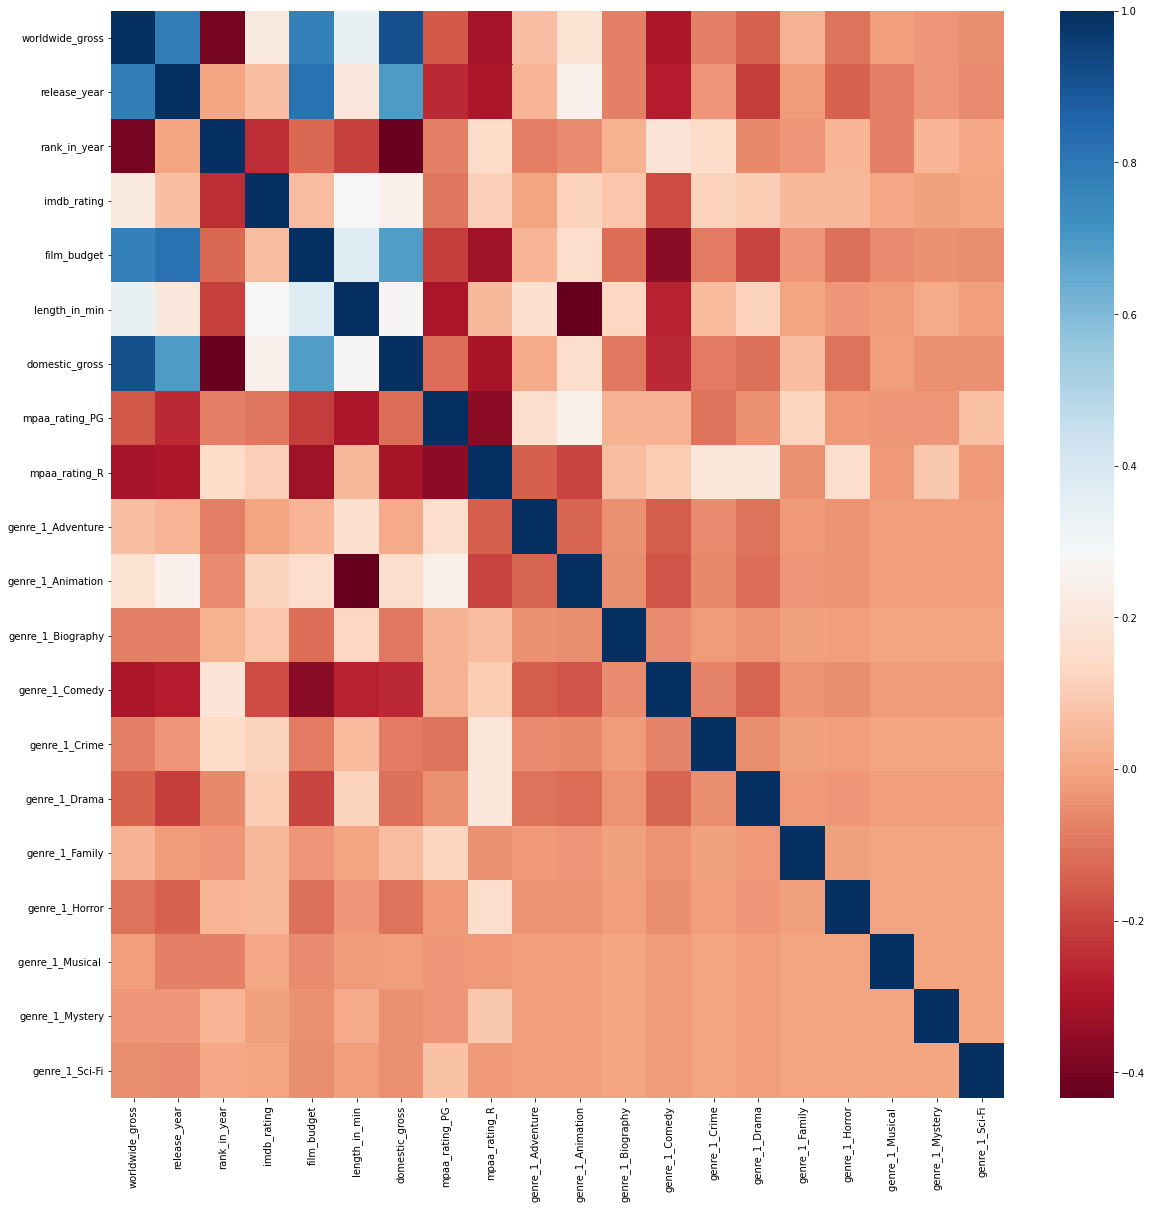

In [40]:
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

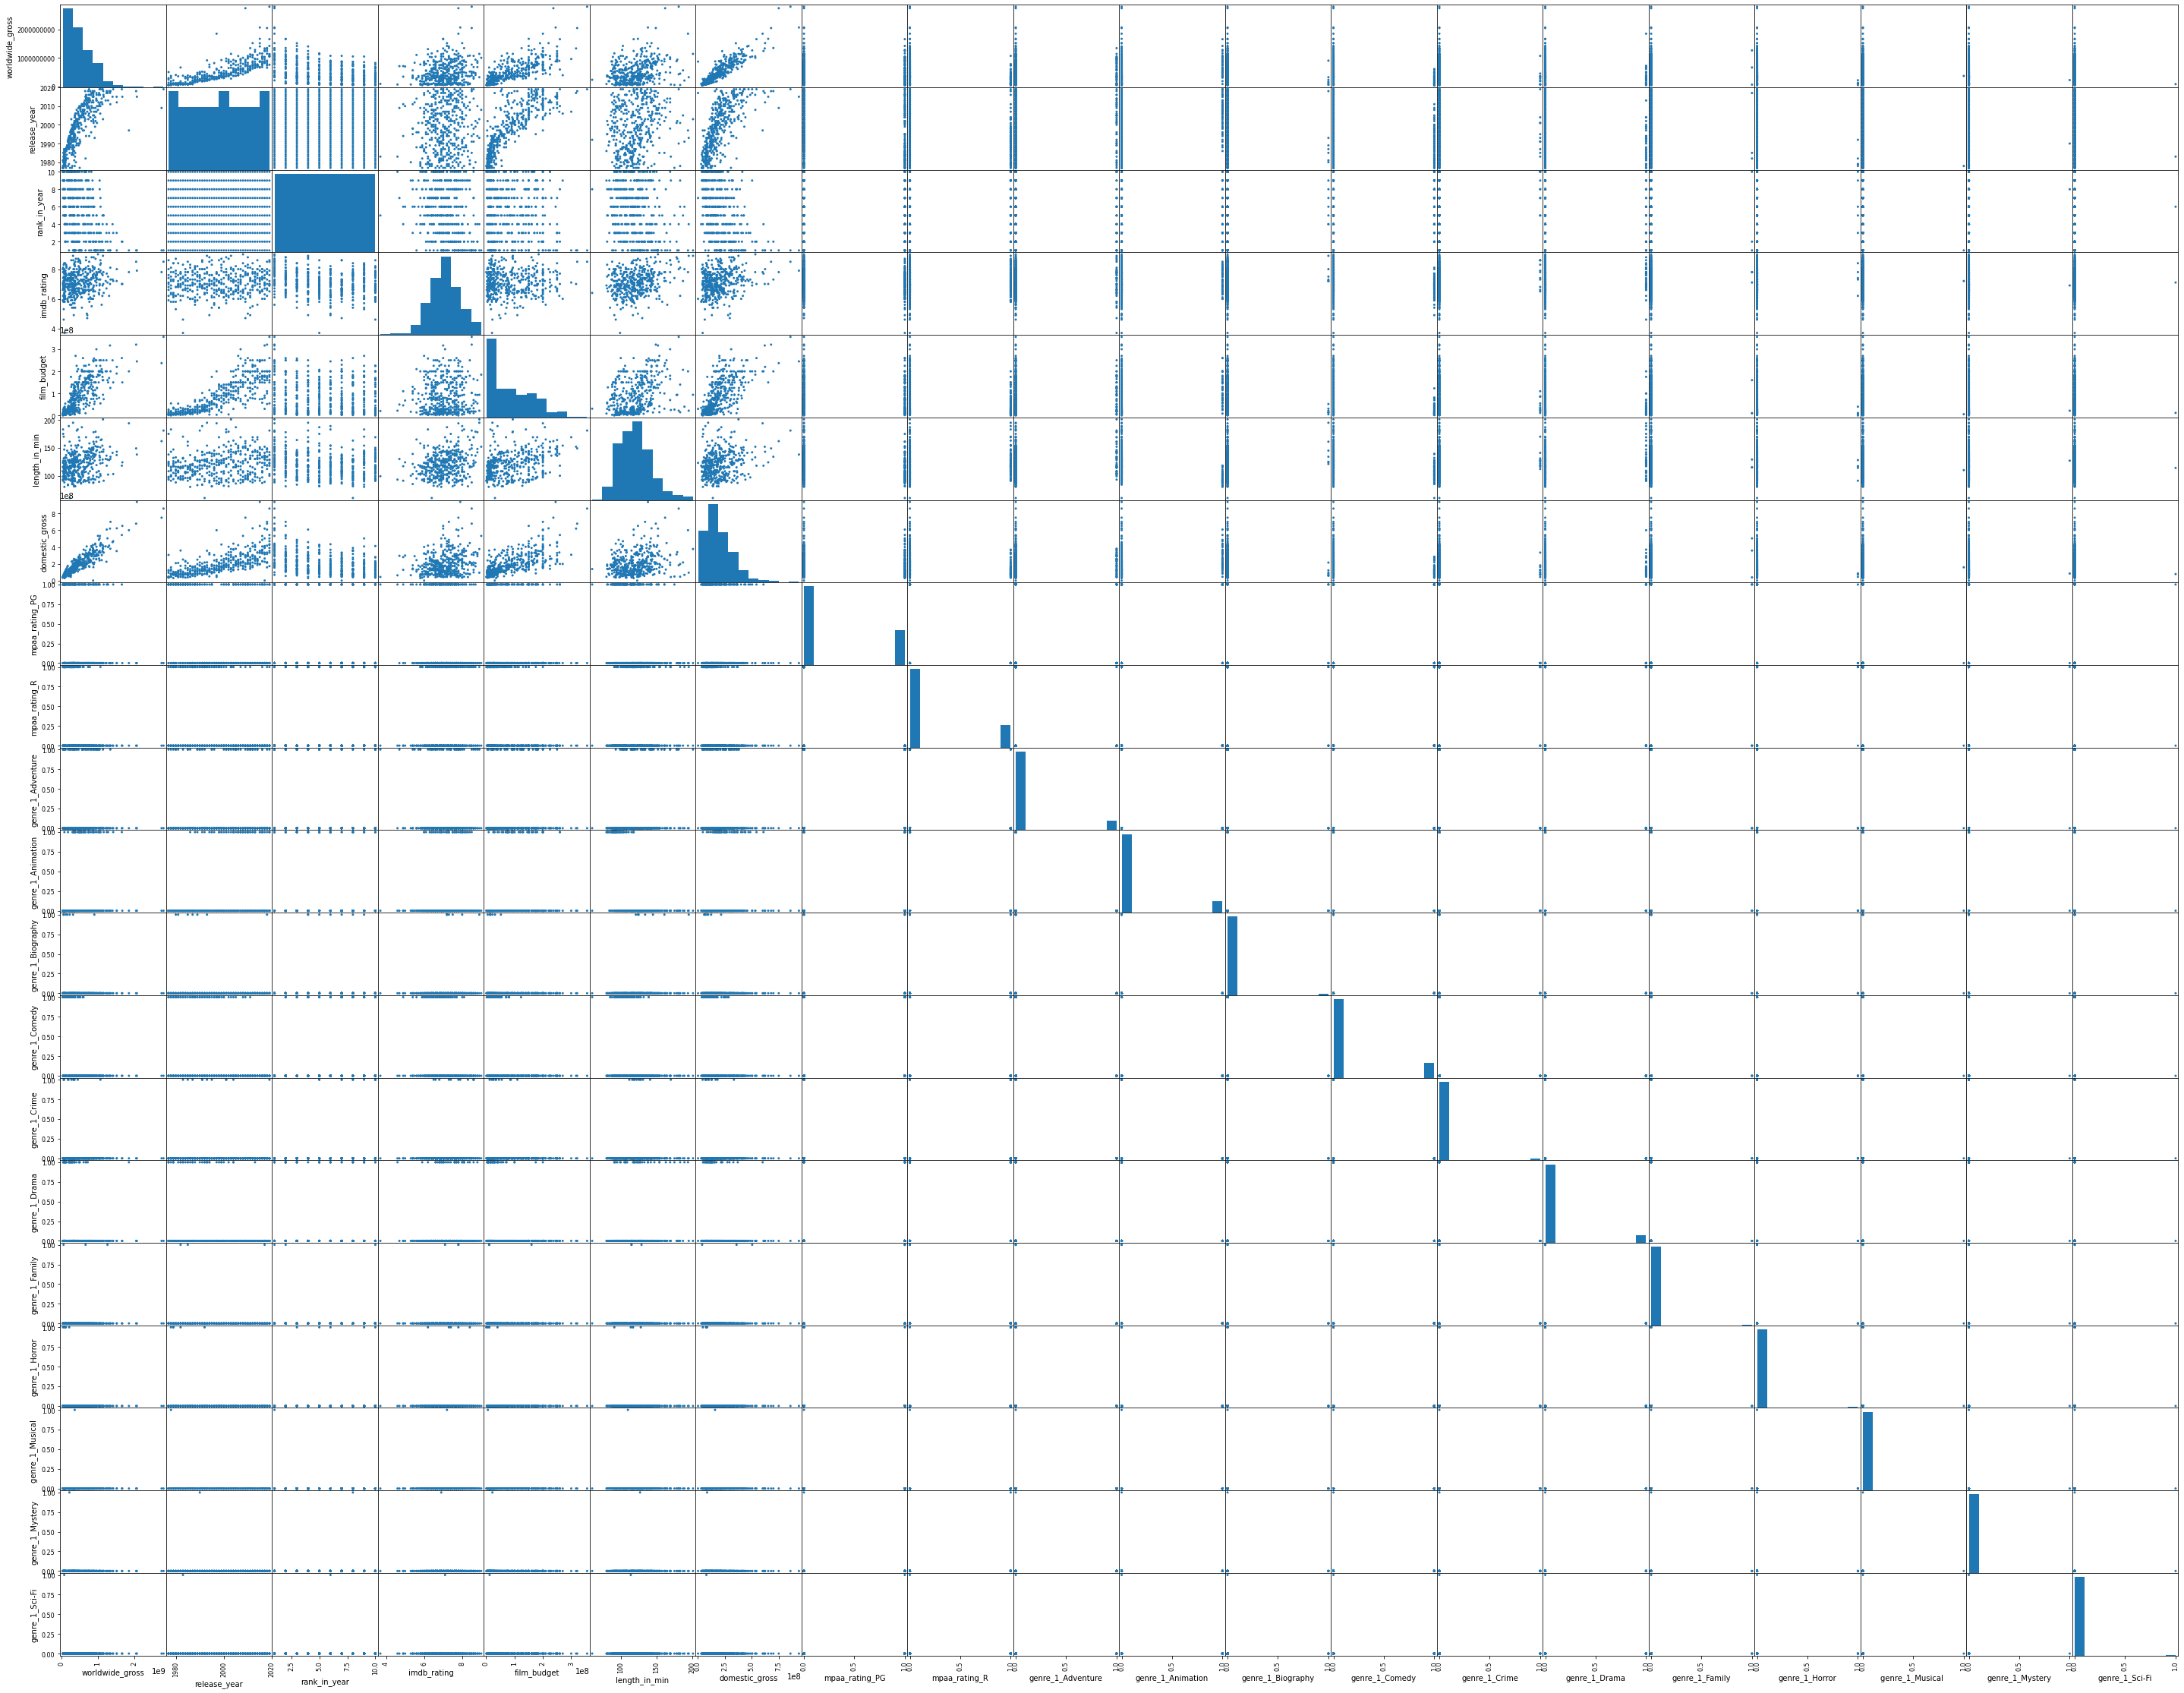

In [41]:
pd.plotting.scatter_matrix(df_after, alpha = 1, figsize = (50, 40))

# show the plot
plt.show()

### Building New Model

In [42]:
X = df_after.drop('worldwide_gross', axis = 1) 
Y = df_after[['worldwide_gross']]

### Splitting Training and Testing Dataset

In [43]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [44]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -2.016e+10
----------------------------------------------------------------------------------------------------
The Coefficient for release_year is 1e+07
The Coefficient for rank_in_year is -2e+07
The Coefficient for imdb_rating is -1.1e+07
The Coefficient for film_budget is 0.52
The Coefficient for length_in_min is 1.4e+06
The Coefficient for domestic_gross is 1.7
The Coefficient for mpaa_rating_PG is 1.8e+07
The Coefficient for mpaa_rating_R is 1.1e+07
The Coefficient for genre_1_Adventure is 2.7e+07
The Coefficient for genre_1_Animation is 3.3e+07
The Coefficient for genre_1_Biography is 7.6e+07
The Coefficient for genre_1_Comedy is 2.7e+07
The Coefficient for genre_1_Crime is 1.9e+07
The Coefficient for genre_1_Drama is 3.7e+06
The Coefficient for genre_1_Family is 3.1e+07
The Coefficient for genre_1_Horror is 8.1e+07
The Coefficient for genre_1_Musical  is 5.4e-07
The Coefficient for genre_1_Mystery is 8.2e+07
The Coefficient for genre_1_Sci-Fi is 1.

In [45]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[2.78719634e+08],
       [2.61377661e+08],
       [6.07439139e+08],
       [1.98281739e+08],
       [9.70636294e+08]])

In [46]:
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.66e+15
MAE 6.64e+07
RMSE 8.75e+07


In [48]:
est.pvalues

const                3.659025e-20
release_year         3.776647e-20
rank_in_year         5.367683e-13
imdb_rating          4.868315e-01
film_budget          1.093319e-03
length_in_min        5.015421e-03
domestic_gross       5.049925e-62
mpaa_rating_PG       5.175632e-01
mpaa_rating_R        6.320168e-01
genre_1_Adventure    7.382984e-02
genre_1_Animation    1.980115e-01
genre_1_Biography    3.467575e-01
genre_1_Comedy       2.670022e-01
genre_1_Crime        2.717261e-01
genre_1_Drama        6.955088e-01
genre_1_Family       5.815582e-01
genre_1_Horror       1.991797e-01
genre_1_Musical      3.158385e-01
genre_1_Mystery      4.968436e-01
genre_1_Sci-Fi       9.664312e-01
dtype: float64

In [49]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.94


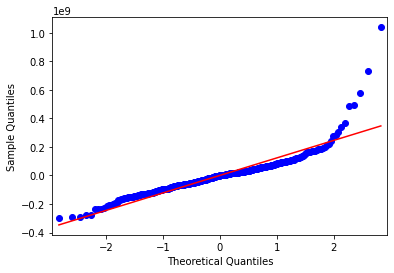

The mean of the residuals is 0.7179


In [50]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [51]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     204.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          2.04e-195
Time:                        20:09:44   Log-Likelihood:                -8618.3
No. Observations:                 430   AIC:                         1.728e+04
Df Residuals:                     410   BIC:                         1.736e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -2.02e+10   2.08e+0

Based on the P-Value I decided to remove genrre_1 Sci-Fi and genre_1 Drama

In [52]:
X = df_after.drop(['genre_1_Drama','genre_1_Sci-Fi','worldwide_gross'], axis = 1) 
Y = df_after[['worldwide_gross']]

In [53]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [54]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -2.014e+10
----------------------------------------------------------------------------------------------------
The Coefficient for release_year is 1e+07
The Coefficient for rank_in_year is -2e+07
The Coefficient for imdb_rating is -1.1e+07
The Coefficient for film_budget is 0.52
The Coefficient for length_in_min is 1.4e+06
The Coefficient for domestic_gross is 1.7
The Coefficient for mpaa_rating_PG is 1.8e+07
The Coefficient for mpaa_rating_R is 1.1e+07
The Coefficient for genre_1_Adventure is 2.7e+07
The Coefficient for genre_1_Animation is 3.3e+07
The Coefficient for genre_1_Biography is 7.5e+07
The Coefficient for genre_1_Comedy is 2.6e+07
The Coefficient for genre_1_Crime is 1.8e+07
The Coefficient for genre_1_Family is 3e+07
The Coefficient for genre_1_Horror is 8e+07
The Coefficient for genre_1_Musical  is 0.0
The Coefficient for genre_1_Mystery is 8.1e+07


In [55]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[2.78454693e+08],
       [2.58907827e+08],
       [6.06936886e+08],
       [1.97734697e+08],
       [9.70907013e+08]])

In [56]:
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.68e+15
MAE 6.64e+07
RMSE 8.76e+07


In [58]:
est.pvalues

const                3.183836e-20
release_year         3.292049e-20
rank_in_year         4.920201e-13
imdb_rating          4.970130e-01
film_budget          1.111280e-03
length_in_min        3.780544e-03
domestic_gross       2.012420e-62
mpaa_rating_PG       5.095778e-01
mpaa_rating_R        6.000691e-01
genre_1_Adventure    8.008218e-02
genre_1_Animation    2.034887e-01
genre_1_Biography    3.730501e-01
genre_1_Comedy       2.958416e-01
genre_1_Crime        2.936443e-01
genre_1_Family       5.993920e-01
genre_1_Horror       2.126308e-01
genre_1_Musical      3.232957e-01
genre_1_Mystery      5.109476e-01
dtype: float64

In [59]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.94


In [60]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     229.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          9.61e-198
Time:                        20:10:03   Log-Likelihood:                -8618.4
No. Observations:                 430   AIC:                         1.727e+04
Df Residuals:                     412   BIC:                         1.735e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.017e+10   2.08e+0

Based on the P-Value I decide remove mpaa_rating R and genre_1 Family

In [61]:
X = df_after.drop(['genre_1_Family','mpaa_rating_R','genre_1_Sci-Fi','genre_1_Drama','worldwide_gross'], axis = 1) 
Y = df_after[['worldwide_gross']]

In [62]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [63]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -1.998e+10
----------------------------------------------------------------------------------------------------
The Coefficient for release_year is 1e+07
The Coefficient for rank_in_year is -2e+07
The Coefficient for imdb_rating is -1.1e+07
The Coefficient for film_budget is 0.5
The Coefficient for length_in_min is 1.4e+06
The Coefficient for domestic_gross is 1.7
The Coefficient for mpaa_rating_PG is 1.6e+07
The Coefficient for genre_1_Adventure is 2.5e+07
The Coefficient for genre_1_Animation is 3.2e+07
The Coefficient for genre_1_Biography is 7.6e+07
The Coefficient for genre_1_Comedy is 2.6e+07
The Coefficient for genre_1_Crime is 2.1e+07
The Coefficient for genre_1_Horror is 8.4e+07
The Coefficient for genre_1_Musical  is 0.0
The Coefficient for genre_1_Mystery is 8.7e+07


In [64]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[2.82574058e+08],
       [2.53642945e+08],
       [6.09868468e+08],
       [1.99749211e+08],
       [9.70080027e+08]])

In [65]:
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.69e+15
MAE 6.63e+07
RMSE 8.77e+07


In [67]:
est.pvalues

const                2.705118e-20
release_year         2.824178e-20
rank_in_year         5.530758e-13
imdb_rating          5.455477e-01
film_budget          1.372238e-03
length_in_min        3.495807e-03
domestic_gross       2.903607e-63
mpaa_rating_PG       5.634803e-01
genre_1_Adventure    9.208175e-02
genre_1_Animation    2.192502e-01
genre_1_Biography    3.762622e-01
genre_1_Comedy       3.135574e-01
genre_1_Crime        2.679151e-01
genre_1_Horror       1.951256e-01
genre_1_Musical      3.417260e-01
genre_1_Mystery      4.866603e-01
dtype: float64

In [68]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.94


In [69]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     260.5
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          4.85e-200
Time:                        20:10:23   Log-Likelihood:                -8618.7
No. Observations:                 430   AIC:                         1.727e+04
Df Residuals:                     414   BIC:                         1.733e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.008e+10   2.06e+0

Based on P-Values we drop imdb_rating, mpaa_rating PG, genre_1 Mystery

In [70]:
X = df_after.drop(['genre_1_Family','mpaa_rating_R','genre_1_Sci-Fi','genre_1_Drama','worldwide_gross','imdb_rating','mpaa_rating_PG','genre_1_Mystery'], axis = 1) 
Y = df_after[['worldwide_gross']]

In [71]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [72]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -1.973e+10
----------------------------------------------------------------------------------------------------
The Coefficient for release_year is 9.9e+06
The Coefficient for rank_in_year is -2e+07
The Coefficient for film_budget is 0.52
The Coefficient for length_in_min is 1.2e+06
The Coefficient for domestic_gross is 1.7
The Coefficient for genre_1_Adventure is 3.1e+07
The Coefficient for genre_1_Animation is 3e+07
The Coefficient for genre_1_Biography is 7.3e+07
The Coefficient for genre_1_Comedy is 2.6e+07
The Coefficient for genre_1_Crime is 1.2e+07
The Coefficient for genre_1_Horror is 7.1e+07
The Coefficient for genre_1_Musical  is 0.0


In [73]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[2.83226992e+08],
       [2.71567220e+08],
       [6.13585913e+08],
       [1.95908769e+08],
       [9.60168018e+08]])

In [74]:
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.29e+15
MAE 6.49e+07
RMSE 8.54e+07


In [76]:
est.pvalues

const                2.878700e-21
release_year         4.329128e-21
rank_in_year         6.454892e-13
film_budget          7.506514e-04
length_in_min        4.475570e-03
domestic_gross       6.201502e-66
genre_1_Adventure    5.814843e-02
genre_1_Animation    2.039998e-01
genre_1_Biography    3.724774e-01
genre_1_Comedy       3.183332e-01
genre_1_Crime        3.286013e-01
genre_1_Horror       2.267395e-01
genre_1_Musical      3.618383e-01
dtype: float64

In [77]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.94


In [78]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     326.9
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          1.62e-203
Time:                        20:10:44   Log-Likelihood:                -8619.3
No. Observations:                 430   AIC:                         1.726e+04
Df Residuals:                     417   BIC:                         1.732e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.985e+10   1.98e+0

In [79]:
X

,release_year,rank_in_year,film_budget,length_in_min,domestic_gross,genre_1_Adventure,genre_1_Animation,genre_1_Biography,genre_1_Comedy,genre_1_Crime,genre_1_Horror,genre_1_Musical
0,2019,1,356000000.0,181,858373000.0,0,0,0,0,0,0,0
1,2019,2,260000000.0,118,543638043.0,0,1,0,0,0,0,0
2,2019,3,150000000.0,103,470089732.0,0,1,0,0,0,0,0
3,2019,4,160000000.0,129,390532085.0,0,0,0,0,0,0,0
4,2019,5,175000000.0,123,426829839.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
425,1977,6,9000000.0,123,47346365.0,1,0,0,0,0,0,0
426,1977,7,14000000.0,125,46838673.0,0,0,0,0,0,0,0
427,1977,8,2100000.0,98,41687243.0,0,0,0,1,0,0,0
428,1977,9,4000000.0,93,38251425.0,0,0,0,1,0,0,0


Based on P-Values we drop genre_1 Biography, genre_1 Musical, and genre_1 Crime

In [80]:
X = df_after.drop(['genre_1_Animation','genre_1_Horror','genre_1_Comedy','genre_1_Crime','genre_1_Biography','genre_1_Family','mpaa_rating_R','genre_1_Sci-Fi','genre_1_Drama','worldwide_gross','imdb_rating','mpaa_rating_PG','genre_1_Mystery'], axis = 1) 
Y = df_after[['worldwide_gross']]

In [81]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [82]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -2.012e+10
----------------------------------------------------------------------------------------------------
The Coefficient for release_year is 1e+07
The Coefficient for rank_in_year is -1.9e+07
The Coefficient for film_budget is 0.47
The Coefficient for length_in_min is 1e+06
The Coefficient for domestic_gross is 1.7
The Coefficient for genre_1_Adventure is 2.2e+07
The Coefficient for genre_1_Musical  is 0.0


In [83]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[2.74306815e+08],
       [2.87007855e+08],
       [6.03700472e+08],
       [1.94610116e+08],
       [9.48618557e+08]])

In [84]:
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.12e+15
MAE 6.42e+07
RMSE 8.44e+07


In [86]:
est.pvalues

const                9.215714e-23
release_year         1.076583e-22
rank_in_year         1.980464e-13
film_budget          1.265761e-03
length_in_min        3.560478e-03
domestic_gross       1.520708e-66
genre_1_Adventure    1.243987e-01
genre_1_Musical      4.084635e-01
dtype: float64

In [87]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.94


In [88]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     560.2
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          3.49e-209
Time:                        20:11:05   Log-Likelihood:                -8621.7
No. Observations:                 430   AIC:                         1.726e+04
Df Residuals:                     422   BIC:                         1.729e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.021e+10   1.94e+0

### Results

Based on the results from the regression model, the most important variables that influence worldwide gross are:
Release year, rank in year, film budget, length in min, and domestic gross. As release year is not a contollable variable, and domestic gross has an obvious corellation to worldwide gross, the most important variables that one should keep in mind to create a successful movie, with success defined as a film's worldwide gross, appear to be the film's length and the film's budget.

### Analysis Plan of Action
This study will explore the correlation between variaous variables to the popularity of the movie. The dataset provides the IMDb rating, and it also provides the worldwide gross sales. We would be able to create a graph of the movies ranked by the various variables such as budget and genre, and then compare it to the movies ranked by Imdb rating and worldwide gross sales. We can also output the top movies from each of the graphs in order to calculate where in the list there are differences to draw the final conclusion. Also, a table can be created with these differences for a complete analysis. 

### Limitation and Future Scope

Our analysis is limited by the amount of movies we are analyzing. For instance, the database used does not include a sizeable number of movies that have been released, only containing ten successful movies from each year in the given range of 1977 to 2019. Further, only a single popular rating metric, imdb ratings, is present in the dataset. For more appreciable analysis of movies using critical and public reception, rather than just worldwide gross, we would need to aggregate rating scores from other sources, such as Rotten Tomato. Such data aquisition and then further analysis would be a topic of future work.